<a href="https://colab.research.google.com/github/JayabharathiRavi/D19_Task_6/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [1]:
from google.colab import files
files.upload()

Saving car_data.csv to car_data.csv


{'car_data.csv': b'Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather\r\n17314.1031289016,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1\r\n17542.0360832793,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n16218.8478619377,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n16336.9131400486,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0\r\n16339.1703239255,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1\r\n15709.0528210833,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n15230.0033898479,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n15048.042184116,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0\r\n14862.0938695978,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1\r\n15295.0182668788,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1\r\n21335.852484891,10237,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,0,0\r\n20538.0875102254,15066,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,1,0\r\n20512.0940912389,16633,Buick,Lacrosse,CX Sedan 4D,Sedan,6,3.6,4,1,1,0

In [271]:
df = pd.read_csv("car_data.csv")

### **PART 1**


In [195]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [196]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

There is no null values.No need of encoding

In [ ]:
#linear equation for mileage vs price

## **EDA**

<function matplotlib.pyplot.show>

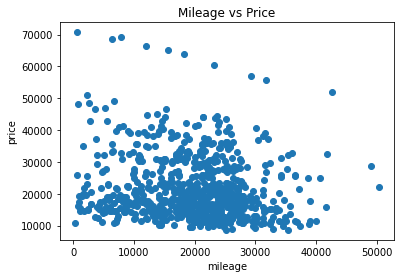

In [197]:
x=df['Mileage']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Mileage vs Price')
plt.show

In [198]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


There is low linear relation b/w mileage and price

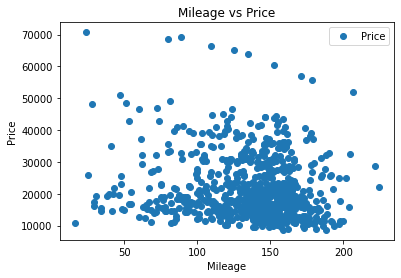

,transformed,Price
transformed,1.000000,-0.149316
Price,-0.149316,1.000000


In [199]:
df['transformed'] = np.sqrt(df['Mileage'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

It has low linear relationship b/w the data.

In [211]:
df.dtypes

Price           float64
Mileage           int64
Make             object
Model            object
Trim             object
Type             object
Cylinder          int64
Liter           float64
Doors             int64
Cruise            int64
Sound             int64
Leather           int64
transformed     float64
sqrt_mileage    float64
dtype: object

In [272]:
df['sqrt_mileage']  = np.sqrt(df['Mileage'])

In [254]:
df.shape

(161, 2)

In [255]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 0].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [257]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [258]:
coeff_df = pd.DataFrame(regressor.coef_,['sqrt_mileage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
sqrt_mileage,9882.027107


In [259]:
regressor.intercept_ # c 

21672.032798799195

In [262]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

In [263]:
y_test.shape,y_pred.shape

((33,), (33,))

In [266]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17294.181001,17294.181001
1,29142.714386,29142.714386
2,21233.911356,21233.911356
3,15756.146130,15756.146130
4,17202.834055,17202.834055
5,15128.992236,15128.992236
6,37192.896366,37192.896366
7,15047.002738,15047.002738
8,14429.789643,14429.789643
9,13998.129276,13998.129276


In [268]:
regressor.intercept_,regressor.coef_

(21672.032798799195, array([9882.02710656]))

Tasks, Part 1

1. Find the linear regression equation for mileage vs price.


> Price= 9882.02710656(sqrt_mileage)+21672.032798799195



In [ ]:
#Price= 9882.02710656(sqrt_mileage)+21672.032798799195

2. Chart the original data and the equation on the chart.

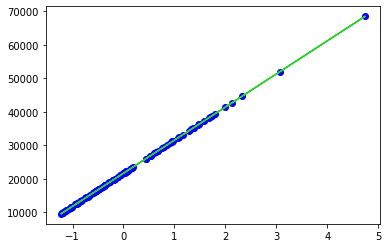

In [288]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='limegreen')

In [ ]:
df

3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [267]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 1.0


PART 2

In [ ]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


<function matplotlib.pyplot.show>

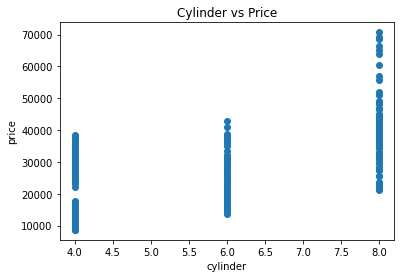

In [292]:
x=df['Cylinder']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('cylinder')
plt.ylabel('price')
plt.title('Cylinder vs Price')
plt.show
df[['Cylinder','Price']].corr()

There is a linear regression b/w datas.No transform needed

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


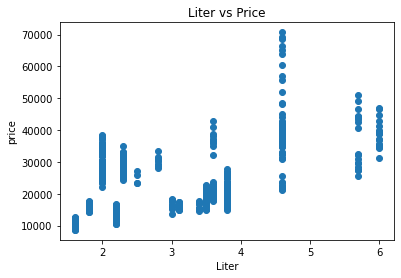

In [294]:
x=df['Liter']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Liter')
plt.ylabel('price')
plt.title('Liter vs Price')
plt.show
df[['Liter','Price']].corr()

There is a linear regression b/w datas.No transform needed

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


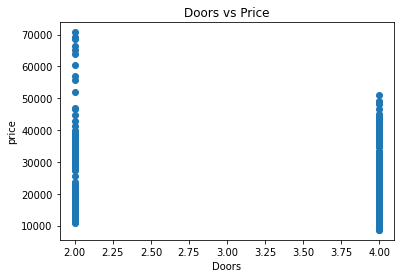

In [295]:
x=df['Doors']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Doors')
plt.ylabel('price')
plt.title('Doors vs Price')
plt.show
df[['Doors','Price']].corr()

There is low linear relationship b/w datas

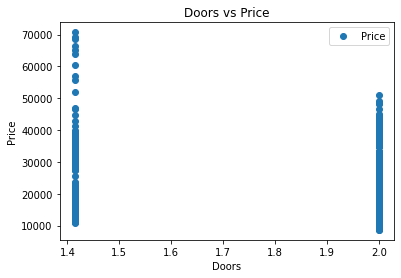

,transformed,Price
transformed,1.00000,-0.13875
Price,-0.13875,1.00000


In [313]:
df['transformed'] = np.sqrt(df['Doors'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

Every transformation gives the same corr

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


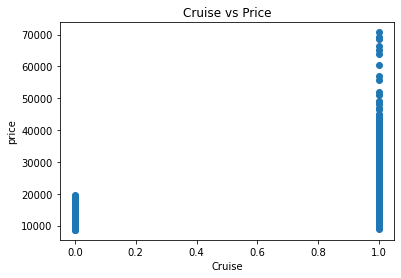

In [311]:
x=df['Cruise']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Cruise')
plt.ylabel('price')
plt.title('Cruise vs Price')
plt.show
df[['Cruise','Price']].corr()

There is a high correlation.No transformation needed

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


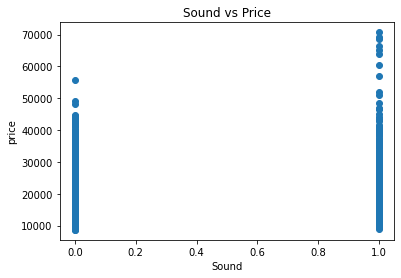

In [312]:
x=df['Sound']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Sound')
plt.ylabel('price')
plt.title('Sound vs Price')
plt.show
df[['Sound','Price']].corr()

There is low linear relationship b/w datas

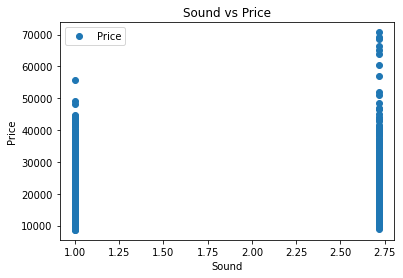

,transformed,Price
transformed,1.000000,-0.124348
Price,-0.124348,1.000000


In [319]:
df['transformed'] = np.exp(df['Sound'])
df.plot(x='transformed', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()
df[['transformed','Price']].corr()

There is no change in corr during transform

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


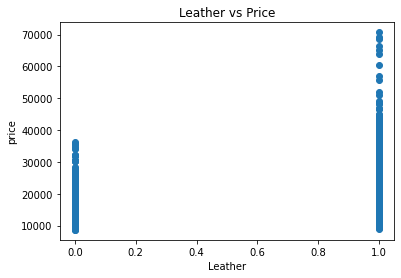

In [320]:
x=df['Leather']
y=df['Price']
plt.scatter(x,y)
plt.xlabel('Leather')
plt.ylabel('price')
plt.title('Leather vs Price')
plt.show
df[['Leather','Price']].corr()

There is low linear relation b/w ddatas.Somewhat nearer to linear

In [340]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df['Price'].values 

In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [363]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [365]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1 .fit(X_train_scaled, y_train)

LinearRegression()

In [368]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1371.001168
Cylinder,5362.757156
Liter,-636.102794
Doors,-1161.421897
Cruise,2605.283666
Sound,-1046.235630
Leather,1599.923922


In [369]:
regressor1.coef_

array([-1372.21762489,  4360.04065747,  -106.15107895,  -861.43431768,
        2605.18799887,  -811.61769682,  1452.21276929])

In [360]:
regressor1.intercept_

21505.23237703496

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
'''
Price = (-1372.21762489)Mileage+(4360.04065747)Cylinder+(-106.15107895)Liter+(-861.43431768)Doors+(2605.18799887)Cruise+
        (-811.61769682)Sound+(1452.21276929)Leather+21505.23237703496

'''

2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [367]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.48943961471662345


3. Find the combination of the factors that is the best predictor for price.

In [334]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', True)]

Leather,Cruise and Cylinder is the combination factors that is the best predictor for price

## **Tasks, Hard Mode**

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [333]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


Find the best combination of factors to predict price.

In [339]:
print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], regressor.coef_)))

[('Mileage', -1371.0011684045362), ('Cylinder', 5362.757155931953), ('Liter', -636.1027939685932), ('Doors', -1161.421896965032), ('Cruise', 2605.283665583878), ('Sound', -1046.2356299570165), ('Leather', 1599.923922438423)]


Cylinder and Curise is the best combination from the above code